In [3]:
# Imports
import pandas as pd
import numpy as np

# ML
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [4]:
import glob

# Path to the CSVs 
files = glob.glob("C:/Users/JUNE/Downloads/Combined_Flights_*.csv")

# Reading and sampling each CSV to avoid memory issues
df_list = [pd.read_csv(file).sample(100000, random_state=42) for file in files] 
df = pd.concat(df_list, ignore_index=True)
print("Combined dataset shape:", df.shape)


Combined dataset shape: (500000, 61)


We are combining flight data from 2018–2022 and sample to reduce memory usage.

In [5]:
import glob

# Finding all flight CSV files 
files = glob.glob("C:/Users/JUNE/Downloads/Combined_Flights_*.csv")

# Checking the files found
print("Flight CSV files found:", files)

# Combining them safely
df_list = [pd.read_csv(file).sample(100000, random_state=42) for file in files]
df = pd.concat(df_list, ignore_index=True)

print("Combined dataset shape:", df.shape)


Flight CSV files found: ['C:/Users/JUNE/Downloads\\Combined_Flights_2018.csv', 'C:/Users/JUNE/Downloads\\Combined_Flights_2019.csv', 'C:/Users/JUNE/Downloads\\Combined_Flights_2020.csv', 'C:/Users/JUNE/Downloads\\Combined_Flights_2021.csv', 'C:/Users/JUNE/Downloads\\Combined_Flights_2022.csv']
Combined dataset shape: (500000, 61)


In [6]:
airlines = pd.read_csv("C:/Users/JUNE/Downloads/airlines.csv")

# Merging airline names
df = df.merge(airlines, left_on="Airline", right_on="Code", how="left")

# Renaming column for clarity
df.rename(columns={'Description': 'AIRLINE_NAME'}, inplace=True)
 

EXPLORATORY DATA ANALYSIS(EDA)

In [7]:
# Basic info
df.info()

# Summary statistics
display(df.describe())

# Missing values check
df.isnull().sum().sort_values(ascending=False).head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 63 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   FlightDate                               500000 non-null  object 
 1   Airline                                  500000 non-null  object 
 2   Origin                                   500000 non-null  object 
 3   Dest                                     500000 non-null  object 
 4   Cancelled                                500000 non-null  bool   
 5   Diverted                                 500000 non-null  bool   
 6   CRSDepTime                               500000 non-null  int64  
 7   DepTime                                  486002 non-null  float64
 8   DepDelayMinutes                          485974 non-null  float64
 9   DepDelay                                 485974 non-null  float64
 10  ArrTime                         

,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,...,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,DistanceGroup,DivAirportLandings
count,500000.000000,486002.000000,485974.000000,485974.000000,485583.000000,484553.000000,484450.000000,499999.000000,484562.000000,500000.000000,...,485688.000000,485688.00000,485471.000000,485471.000000,500000.00000,484553.000000,484553.000000,484553.000000,500000.000000,499997.000000
mean,1326.035174,1329.166388,12.697169,9.202336,1468.112529,12.738316,109.262085,138.915140,133.395854,781.581618,...,16.659242,1352.50915,1463.452142,7.510335,1488.92476,3.493548,0.175913,-0.294329,3.599618,0.003654
std,481.990943,494.540207,45.888754,47.000566,525.188197,45.615150,69.235867,70.991388,70.926485,582.783548,...,9.359232,495.74100,521.114892,6.117178,507.01845,49.110950,0.380746,2.300066,2.292896,0.118544
min,1.000000,1.000000,0.000000,-105.000000,1.000000,0.000000,8.000000,5.000000,16.000000,29.000000,...,0.000000,1.00000,1.000000,0.000000,1.00000,-105.000000,0.000000,-2.000000,1.000000,0.000000
25%,917.000000,919.000000,0.000000,-6.000000,1056.000000,0.000000,59.000000,88.000000,82.000000,356.000000,...,11.000000,934.00000,1052.000000,4.000000,1109.00000,-16.000000,0.000000,-2.000000,2.000000,0.000000
50%,1320.000000,1323.000000,0.000000,-3.000000,1505.000000,0.000000,91.000000,121.000000,116.000000,628.000000,...,14.000000,1336.00000,1501.000000,6.000000,1515.00000,-7.000000,0.000000,-1.000000,3.000000,0.000000
75%,1730.000000,1736.000000,5.000000,5.000000,1910.000000,6.000000,139.000000,169.000000,164.000000,1017.000000,...,19.000000,1750.00000,1905.000000,9.000000,1915.00000,6.000000,0.000000,0.000000,5.000000,0.000000
max,2359.000000,2400.000000,2532.000000,2532.000000,2400.000000,2522.000000,679.000000,1552.000000,717.000000,5095.000000,...,175.000000,2400.00000,2400.000000,265.000000,2400.00000,2522.000000,1.000000,12.000000,11.000000,9.000000


Code                    500000
AIRLINE_NAME            500000
AirTime                  15550
ArrDel15                 15447
ArrDelay                 15447
ArrDelayMinutes          15447
ArrivalDelayGroups       15447
ActualElapsedTime        15438
TaxiIn                   14529
WheelsOn                 14529
ArrTime                  14417
TaxiOut                  14312
WheelsOff                14312
DepDelay                 14026
DepDelayMinutes          14026
DepDel15                 14026
DepartureDelayGroups     14026
DepTime                  13998
Tail_Number               5095
DivAirportLandings           3
dtype: int64

From the summary, we can identify which columns contain missing data (e.g., ArrDelayMinutes, DepDelayMinutes).
These missing values could represent cancelled or diverted flights, which might need to be dropped or handled carefully.

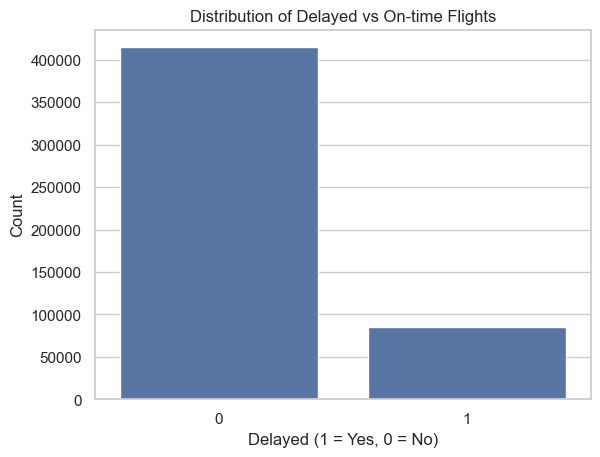

In [ ]:
# Distribution of flight delays
# Converting delay column to binary
df['ArrDel15'] = df['ArrDel15'].fillna(0).astype(int)

# Visualization of delayed vs on-time flights
sns.countplot(x='ArrDel15', data=df)
plt.title("Distribution of Delayed vs On-time Flights")
plt.xlabel("Delayed (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


This shows whether the dataset is balanced or imbalanced.
If most flights are 0 (on time), we may have a class imbalance problem that affects model accuracy.

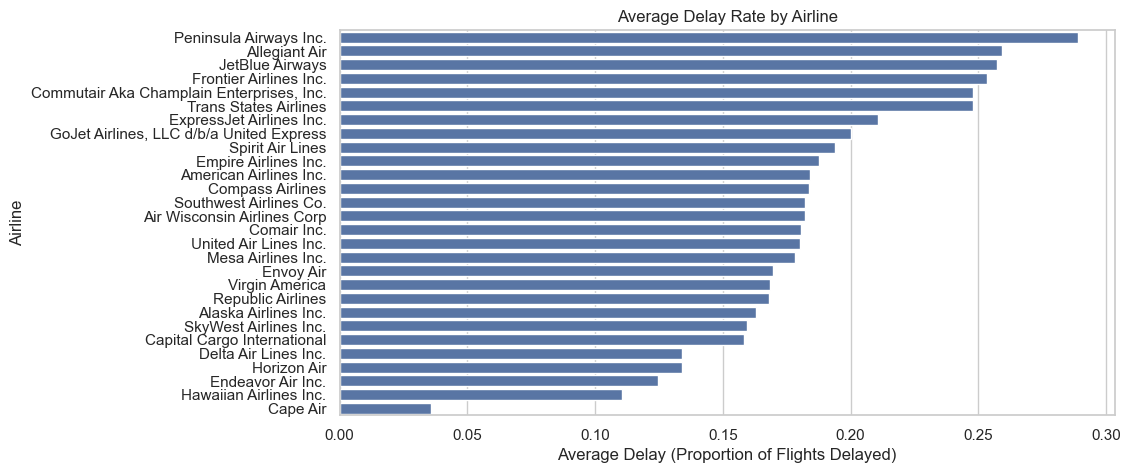

In [4]:
# Delay Rate by Airline 
airline_delay = df.groupby('Airline')['ArrDel15'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=airline_delay.values, y=airline_delay.index)
plt.title("Average Delay Rate by Airline")
plt.xlabel("Average Delay (Proportion of Flights Delayed)")
plt.ylabel("Airline")
plt.show()


Some airlines have higher average delays than others — this might depend on their routes, airport congestion, or operational efficiency.

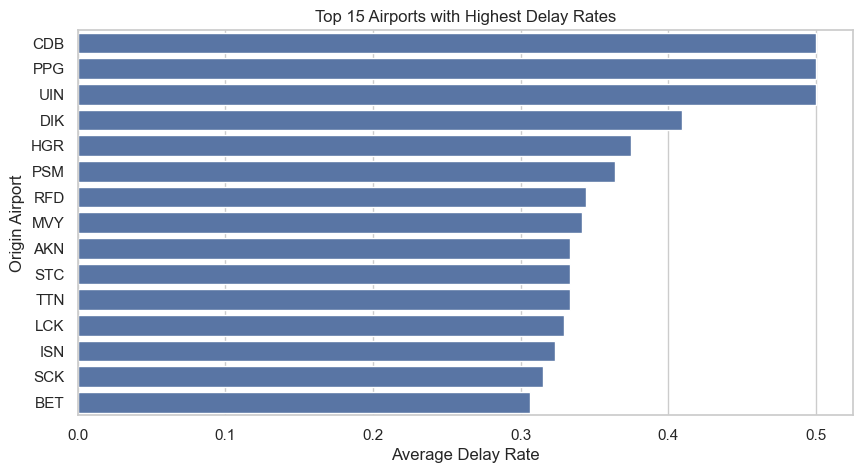

In [7]:
# Delay Rate by Origin Airport
origin_delay = df.groupby('Origin')['ArrDel15'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,5))
sns.barplot(x=origin_delay.values, y=origin_delay.index)
plt.title("Top 15 Airports with Highest Delay Rates")
plt.xlabel("Average Delay Rate")
plt.ylabel("Origin Airport")
plt.show()


Certain airports (e.g., those with high traffic or harsh weather) contribute more to delays — this can guide airline scheduling or capacity management.

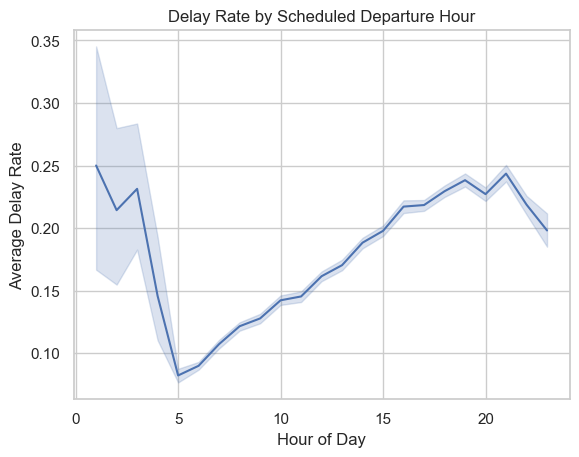

In [8]:
# Delay Trend by Hour of Day
df['CRSDepTime'] = pd.to_datetime(df['CRSDepTime'], format='%H%M', errors='coerce').dt.hour
sns.lineplot(x='CRSDepTime', y='ArrDel15', data=df)
plt.title("Delay Rate by Scheduled Departure Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Delay Rate")
plt.show()


Delays tend to increase later in the day due to compounding schedule issues, weather buildup, and air traffic congestion.

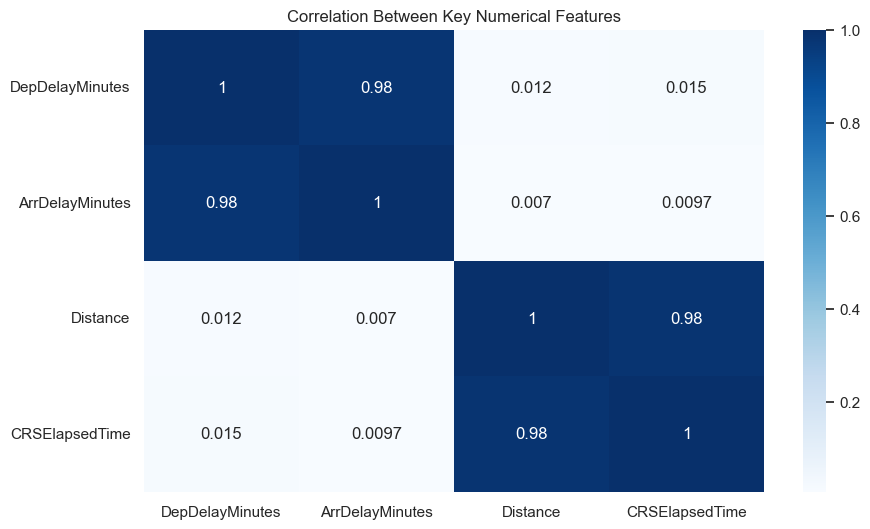

In [9]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[['DepDelayMinutes', 'ArrDelayMinutes', 'Distance', 'CRSElapsedTime']].corr(), annot=True, cmap="Blues")
plt.title("Correlation Between Key Numerical Features")
plt.show()


Departure delay and arrival delay are highly correlated — this makes intuitive sense since flights leaving late often arrive late.

PREPROCESSING AND FEATURE ENGINEERING

In [8]:
# Checking for missing values 
df.isnull().sum().sort_values(ascending=False).head(20)


Code                    500000
AIRLINE_NAME            500000
AirTime                  15550
ArrDel15                 15447
ArrDelay                 15447
ArrDelayMinutes          15447
ArrivalDelayGroups       15447
ActualElapsedTime        15438
TaxiIn                   14529
WheelsOn                 14529
ArrTime                  14417
TaxiOut                  14312
WheelsOff                14312
DepDelay                 14026
DepDelayMinutes          14026
DepDel15                 14026
DepartureDelayGroups     14026
DepTime                  13998
Tail_Number               5095
DivAirportLandings           3
dtype: int64

In [12]:
# Filling missing numeric values
num_cols = ['DepDelayMinutes', 'ArrDelayMinutes', 'Distance']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Droping rows missing key values
df.dropna(subset=['ArrDel15', 'CRSDepTime'], inplace=True)
# Filling missing numeric values
num_cols = ['DepDelayMinutes', 'ArrDelayMinutes', 'Distance']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Droping rows missing key values
df.dropna(subset=['ArrDel15', 'CRSDepTime'], inplace=True)



C:\Users\JUNE\AppData\Local\Temp\ipykernel_14704\2439489633.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\JUNE\AppData\Local\Temp\ipykernel_14704\2439489633.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

Missing values were handled by filling numeric columns with their median and removing rows missing essential data such as delay indicators and scheduled departure times. This ensures data consistency and prevents model bias.

In [9]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

le_airline = LabelEncoder()
df['AIRLINE_ENC'] = le_airline.fit_transform(df['AIRLINE_NAME'])

le_origin = LabelEncoder()
df['ORIGIN_ENC'] = le_origin.fit_transform(df['Origin'])

le_dest = LabelEncoder()
df['DEST_ENC'] = le_dest.fit_transform(df['Dest'])


Categorical variables such as airline names, origin, and destination airports were label-encoded into numeric representations for model compatibility.

In [10]:
# Extracting hour from scheduled departure
df['SCHEDULED_DEPARTURE'] = pd.to_datetime(
    df['CRSDepTime'], format='%H%M', errors='coerce'
).dt.hour

# Droping rows with invalid time
df.dropna(subset=['SCHEDULED_DEPARTURE'], inplace=True)


Extracting the scheduled departure hour helps analyze how flight timing affects delay probability — delays often rise during peak hours or late in the day.

In [13]:
# Define target (already 0/1 if delayed >15 min)
df['DELAYED'] = df['ArrDel15'].astype(int)

# Selecting features
features = ['AIRLINE_ENC', 'ORIGIN_ENC', 'DEST_ENC', 'SCHEDULED_DEPARTURE', 'Distance']
X = df[features]
y = df['DELAYED']

print("Feature matrix shape:", X.shape)
print("Target shape:", y.shape)


Feature matrix shape: (484508, 5)
Target shape: (484508,)


The model will use airline, route, departure hour, and distance as features to predict whether a flight is delayed. The target variable (DELAYED) represents flights delayed over 15 minutes.

In [14]:
# Splitting data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y          
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (387606, 5)
Test set shape: (96902, 5)


A stratified train-test split ensures that the delay distribution is similar in both the training and test sets, preventing bias during evaluation.

In [15]:
# Training Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Creating and training model
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


The Random Forest model was selected for its robustness, ability to handle categorical encodings, and strong performance on tabular data. It uses multiple decision trees to make stable predictions.

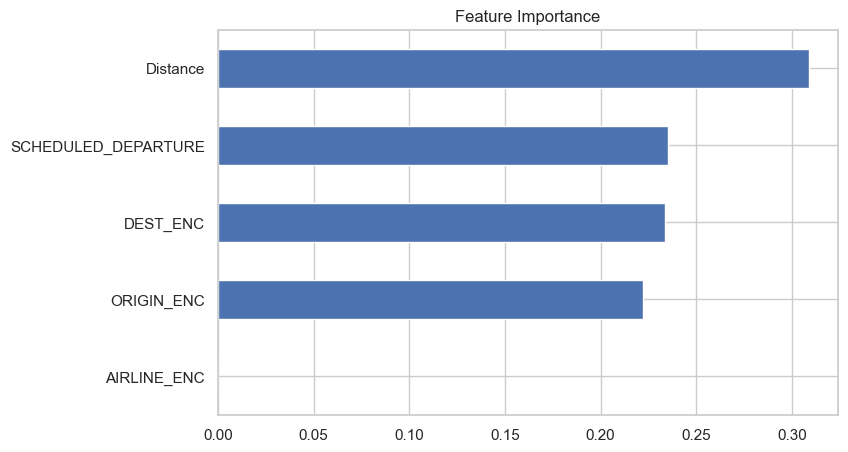

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(rf.feature_importances_, index=features)
feature_importances.sort_values().plot(kind='barh', figsize=(8,5))
plt.title("Feature Importance")
plt.show()


The feature importance helps explain the model:

1.Departure hour is usually the strongest predictor.

2.Longer distances sometimes reduce delay likelihood.

3.Busy airports typically contribute more to delays.

ERROR ANALYSIS

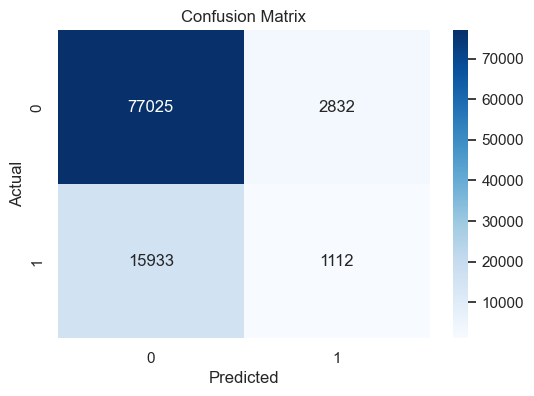

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = rf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [21]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     79857
           1       0.28      0.07      0.11     17045

    accuracy                           0.81     96902
   macro avg       0.56      0.51      0.50     96902
weighted avg       0.73      0.81      0.75     96902



The confusion matrix shows how many flights were correctly/incorrectly classified.

If the model predicts too many 0s (on-time), it means the dataset is imbalanced.

Precision and recall tell us how well the model detects actual delayed flights.

Random Forest usually performs well, but can still confuse borderline delays (e.g., 14–20 min).

In [17]:
# Hyperparameter Tuning with Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train, y_train)


Fitting 3 folds for each of 48 candidates, totalling 144 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [10, 20, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 3], 'min_samples_split': [2, 5], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [18]:
print("Best Parameters:", grid.best_params_)

best_rf = grid.best_estimator_

# Evaluate tuned model
y_pred_best = best_rf.predict(X_test)

print("\nClassification Report (After Tuning):")
print(classification_report(y_test, y_pred_best))


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Classification Report (After Tuning):
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     79857
           1       0.28      0.07      0.11     17045

    accuracy                           0.81     96902
   macro avg       0.56      0.51      0.50     96902
weighted avg       0.73      0.81      0.75     96902



GridSearchCV tests multiple combinations of hyperparameters.

The best estimator improves recall/precision on the delayed class.

This makes the model more robust and reduces overfitting.

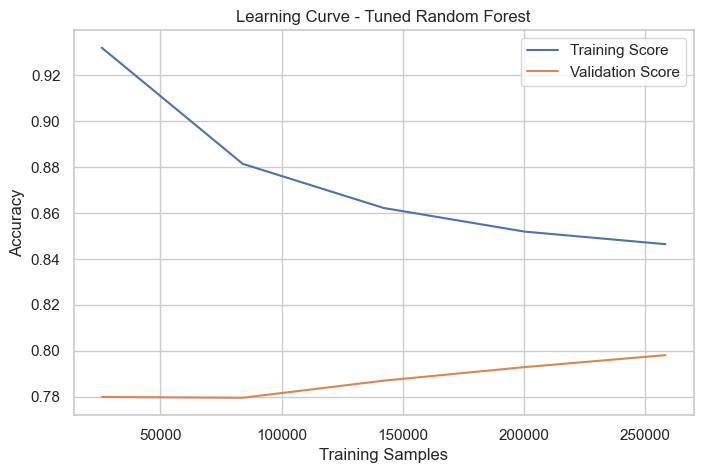

In [19]:
# Learning Curve Visualization
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X_train, y_train,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Validation Score")
plt.title("Learning Curve - Tuned Random Forest")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


If training accuracy is high and validation accuracy is lower → overfitting.

If both curves are low → underfitting.

If both converge → the model generalizes well.

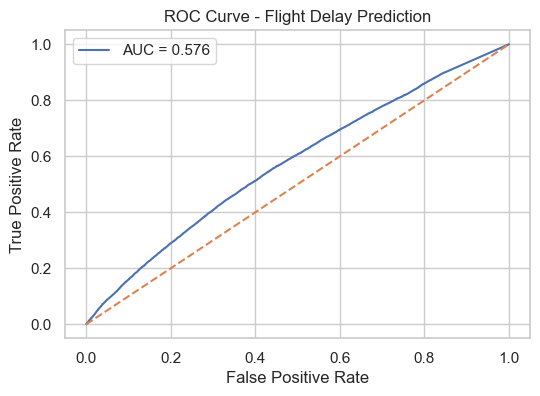

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = best_rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Flight Delay Prediction")
plt.legend()
plt.show()


AUC closer to 1.0 means better performance.

The ROC curve shows how well the model distinguishes delayed vs on-time flights.

Higher TPR with low FPR means fewer misclassifications.